# Donor Choose : Clustering

In [1]:
import os

os.chdir('E:\Datasets\DonorChoose')

In [2]:
import pandas as pd

donor = pd.read_csv('cleandonor4.csv')

donor.head(2)

teacher_prefix school_state  teacher_number_of_previously_posted_projects  \
0           Mrs.           IN                                             0   
1            Mr.           FL                                             7   

   project_is_approved              clean_categories  \
0                    0             Literacy-Language   
1                    1  History-Civics Health-Sports   

              clean_subcategory  \
0                  ESL Literacy   
1  Civics-Government TeamSports   

                                          cleanEssay  price  quantity  \
0  My students are English learners that are work...  154.6        23   
1  Our students arrive to our school eager to lea...  299.0         1   

  cleanProjectGradeCategory                                     project_title  
0                  PreK-Two  Educational Support for English Learners at Home  
1                 Six-Eight             Wanted: Projector for Hungry Learners

In [3]:
# We are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [4]:
from tqdm import tqdm
ftitle = [] 

for sen in tqdm( donor['project_title'].values ): 
    strY = " "

    for w in sen.lower().split():
        if w not in stopwords:
            strY = strY + w + " "

    ftitle.append( strY.strip() )

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:01<00:00, 78344.45it/s]


In [5]:
donor.drop(['project_title'], axis=1, inplace=True)
donor['cleanTitle'] = ftitle

In [6]:
nan = donor[ donor['teacher_prefix'].isnull() ]
nan

Empty DataFrame
Columns: [teacher_prefix, school_state, teacher_number_of_previously_posted_projects, project_is_approved, clean_categories, clean_subcategory, cleanEssay, price, quantity, cleanProjectGradeCategory, cleanTitle]
Index: []

In [7]:
donor = donor[0 : 5000]
donor.shape

(5000, 11)

In [8]:
Y = donor['project_is_approved']

In [9]:
donor.drop(['project_is_approved'], axis = 1, inplace = True)

In [10]:
X = donor

## Essay

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

BOWvect = CountVectorizer( min_df = 15 )
# ngram_range : The lower and upper boundary of the range of n-values for different n-grams to be extracted.
# max_features : build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

BOWvect.fit( donor['cleanEssay'].values )
# vect.fit( text ): Means that internally it is only learning the vocabulary of `Text` i.e. unique n-grams

# THE VOCABULARY SHOULD BUILT ONLY WITH THE WORDS OF TRAIN DATA

xtrEssayBOW = BOWvect.transform( donor['cleanEssay'].values ) 


print( xtrEssayBOW.shape )


(5000, 3516)


## Project Title

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer( min_df = 15 )

vect.fit( donor['cleanTitle'].values )

xtrTitleBOW = vect.transform( donor['cleanTitle'].values )


print( xtrTitleBOW.shape )


(5000, 225)


## State

In [13]:
vectState = CountVectorizer()

vectState.fit( donor['school_state'].values )

xtrState = vectState.transform( donor['school_state'].values )

print( xtrState.shape )


(5000, 51)


## Teacher Prefix

In [14]:
vectPrefix = CountVectorizer( vocabulary = ['dr', 'mr', 'mrs', 'ms', 'teacher'] )

vectPrefix.fit( donor['teacher_prefix'].values )

xtrPrefix = vectPrefix.transform( donor['teacher_prefix'].values )


print( xtrPrefix.shape )


(5000, 5)


## Project Categories

In [15]:
vectCat = CountVectorizer()

vectCat.fit( donor['clean_categories'].values )

xtrCat = vectCat.transform( donor['clean_categories'].values )

print( xtrCat.shape )


(5000, 15)


## Subcategory

In [16]:
vectSubCat = CountVectorizer()

vectSubCat.fit( donor['clean_subcategory'].values )

xtrSubCat = vectSubCat.transform( donor['clean_subcategory'].values )

print( xtrSubCat.shape )


(5000, 37)


## Project Grade Category

In [17]:
vectGCat = CountVectorizer()

vectGCat.fit( donor['cleanProjectGradeCategory'].values )

xtrGCat = vectGCat.transform( donor['cleanProjectGradeCategory'].values )

print( xtrGCat.shape )


(5000, 8)


## Price

In [18]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

# norm.fit( xtrain['price'].values ) # gives error : Expected 2D array, got 1D array instead
norm.fit( donor['price'].values.reshape(-1,1) )

xtrPrice = norm.transform( donor['price'].values.reshape(-1,1) )


print( xtrPrice.shape )


(5000, 1)


## Previously posted Projects

In [19]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

# norm.fit( xtrain['price'].values ) # gives error : Expected 2D array, got 1D array instead
norm.fit( donor['teacher_number_of_previously_posted_projects'].values.reshape(-1,1) )

xtrPrev = norm.transform( donor['teacher_number_of_previously_posted_projects'].values.reshape(-1,1) )

print( xtrPrev.shape )


(5000, 1)


## Quantity

In [20]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

# norm.fit( xtrain['price'].values ) # gives error : Expected 2D array, got 1D array instead
norm.fit( donor['quantity'].values.reshape(-1,1) )

xtrQuan = norm.transform( donor['quantity'].values.reshape(-1,1) )

print( xtrQuan.shape )


(5000, 1)


### Merging Data`

In [ ]:


from scipy.sparse import hstack

xtr1 = hstack(( xtrEssayBOW, xtrTitleBOW, xtrState, xtrPrefix, xtrCat, xtrSubCat, xtrGCat, xtrPrice, xtrPrev, xtrQuan )).tocsr()


print( xtr1.shape )

## KMeans Clustering

In [23]:
from sklearn.cluster import KMeans

n = [2, 5, 8, 11, 15]
inertia = []

print(' '*9,'- First -', ' '*12,'- Second -', ' '*12,'- Third -', ' '*12,'- Fourth -', ' '*12,'- Fifth -')
print(end='    ')

for i in n:
    
    km = KMeans( n_clusters = i, random_state=42 )
    km.fit( xtr1 )
    
    inertia.append( km.inertia_ )
    
    print('#'*20, end ='    ' )
    
# inertia_ : (float) Sum of squared distances of samples to their closest cluster center.

          - First -              - Second -              - Third -              - Fourth -              - Fifth -
    ####################    ####################    ####################    ####################    ####################    

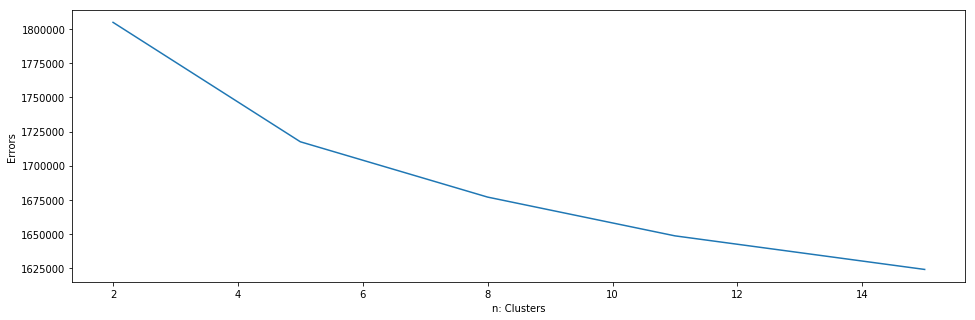

In [24]:
import matplotlib.pyplot as plt

plt.figure( figsize=(16,5) ) 
plt.plot( n, inertia )
plt.xlabel('n: Clusters')
plt.ylabel('Errors')
plt.show()

In [25]:
bestN = 5

km = KMeans( n_clusters = bestN, random_state=42 )
km.fit( xtr1 )

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [56]:
print( km.labels_.shape )
print( km.labels_[:35] )

# labels_ : Labels of each point

(5000,)
[1 3 4 2 2 4 1 1 3 2 1 4 3 2 2 1 2 4 2 1 3 0 1 3 2 2 2 1 0 2 0 4 2 2 0]


In [64]:
l = set( km.labels_ )
l

{0, 1, 2, 3, 4}

In [27]:
import numpy as np

clusterSet = { i: np.where( km.labels_ == i )[0] for i in range(bestN) }

clusterText = dict()

In [36]:
print( clusterSet[0].shape )
print( clusterSet[1].shape )
print( clusterSet[2].shape )
print( clusterSet[3].shape )
print( clusterSet[4].shape )

clusterSet[2]

(1008,)
(884,)
(1804,)
(688,)
(616,)


array([   3,    4,    9, ..., 4990, 4995, 4997], dtype=int64)

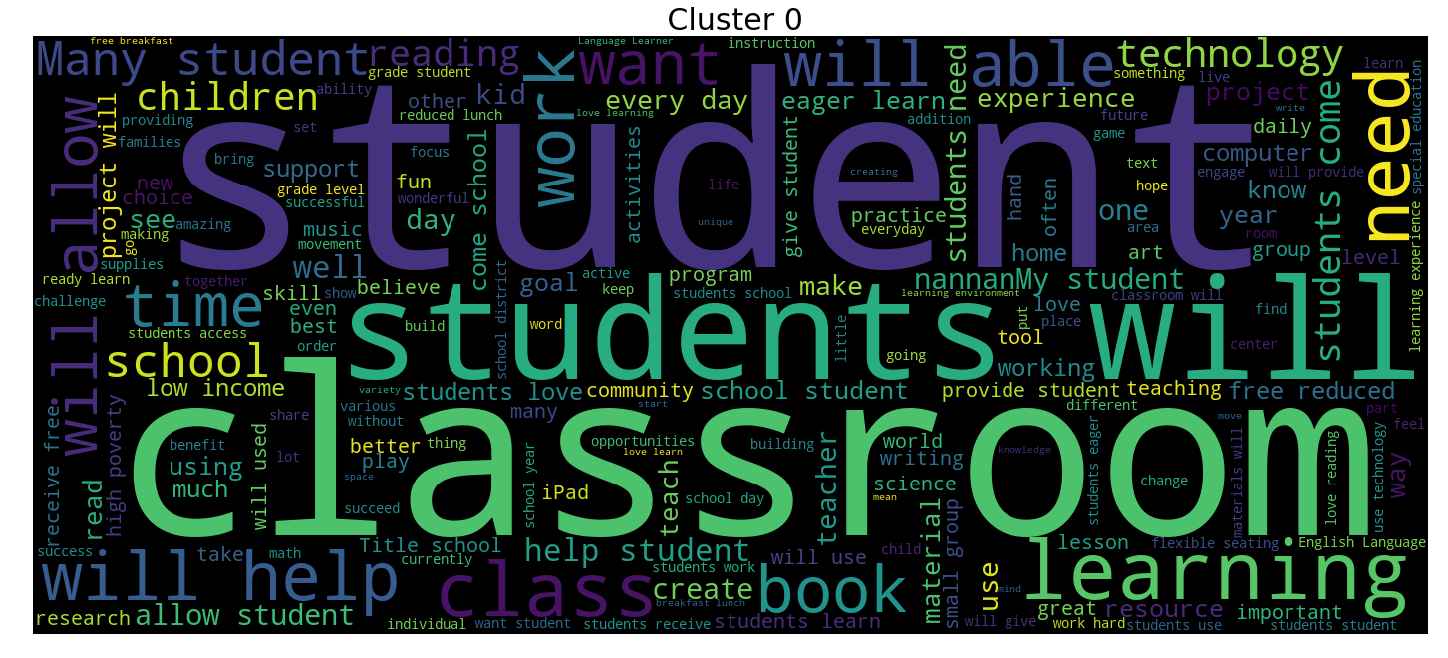

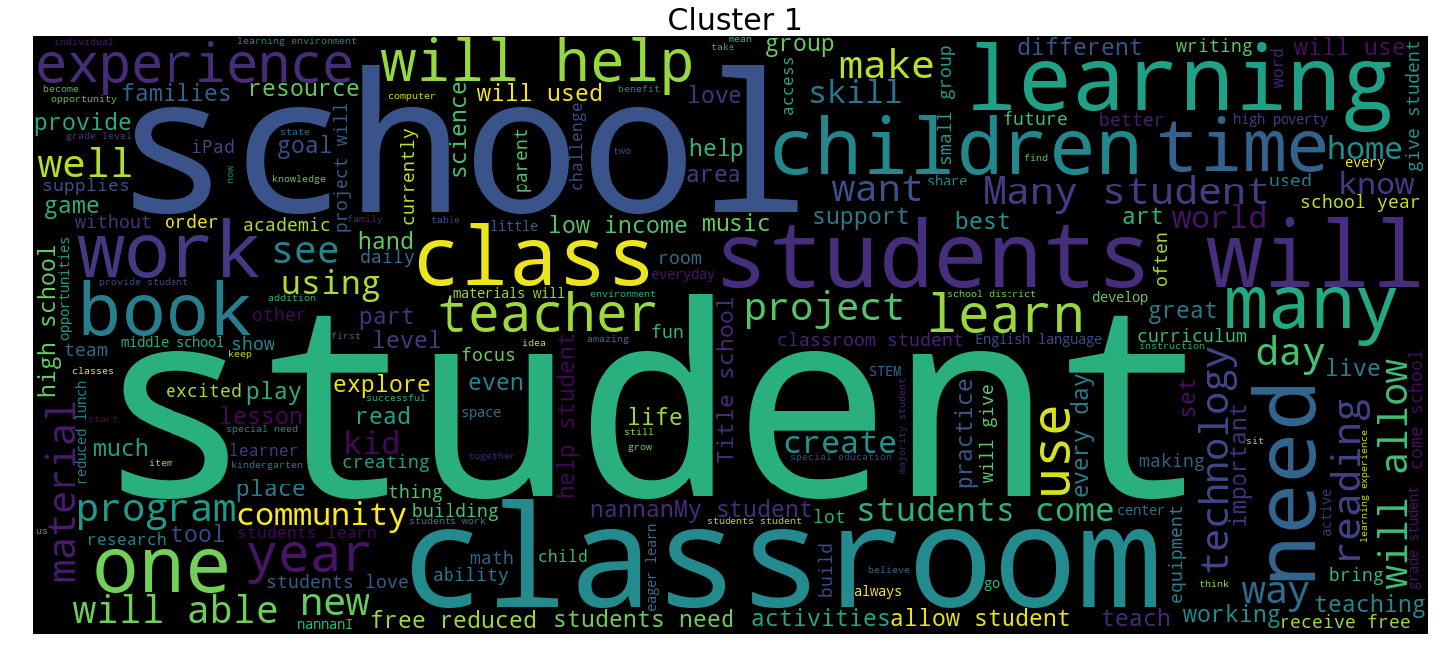

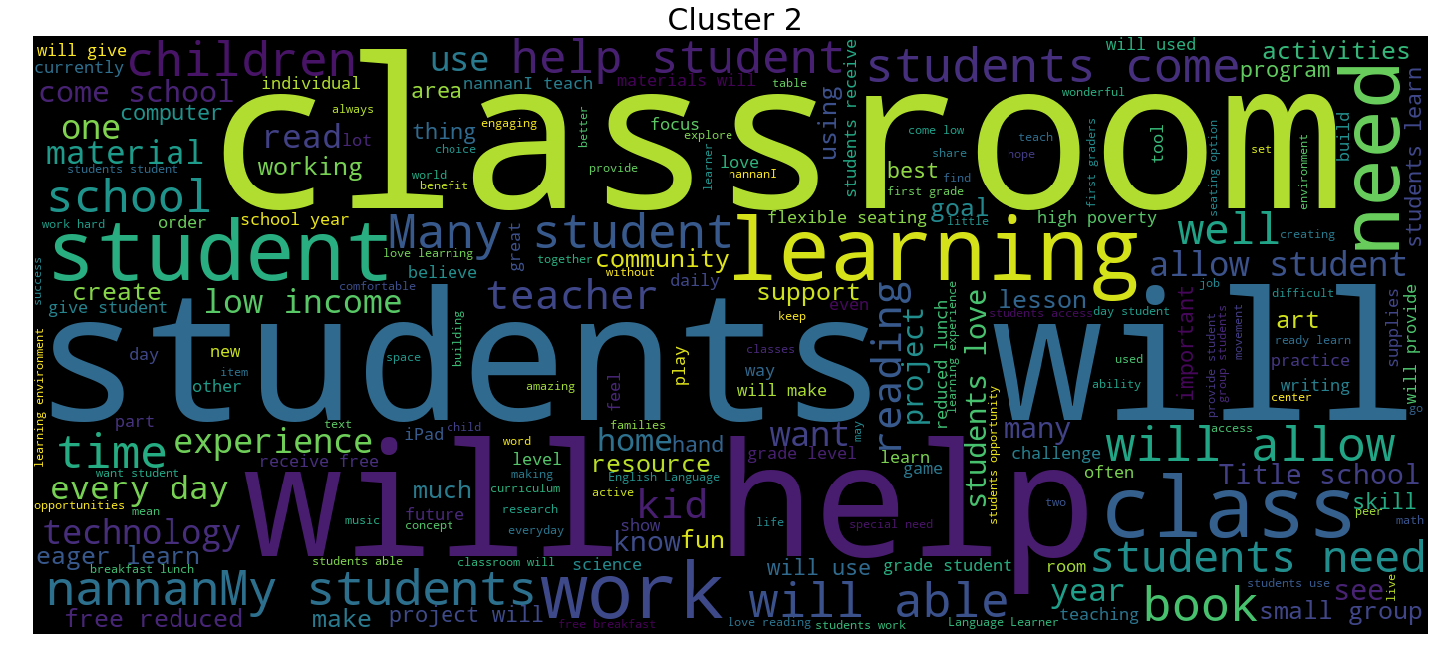

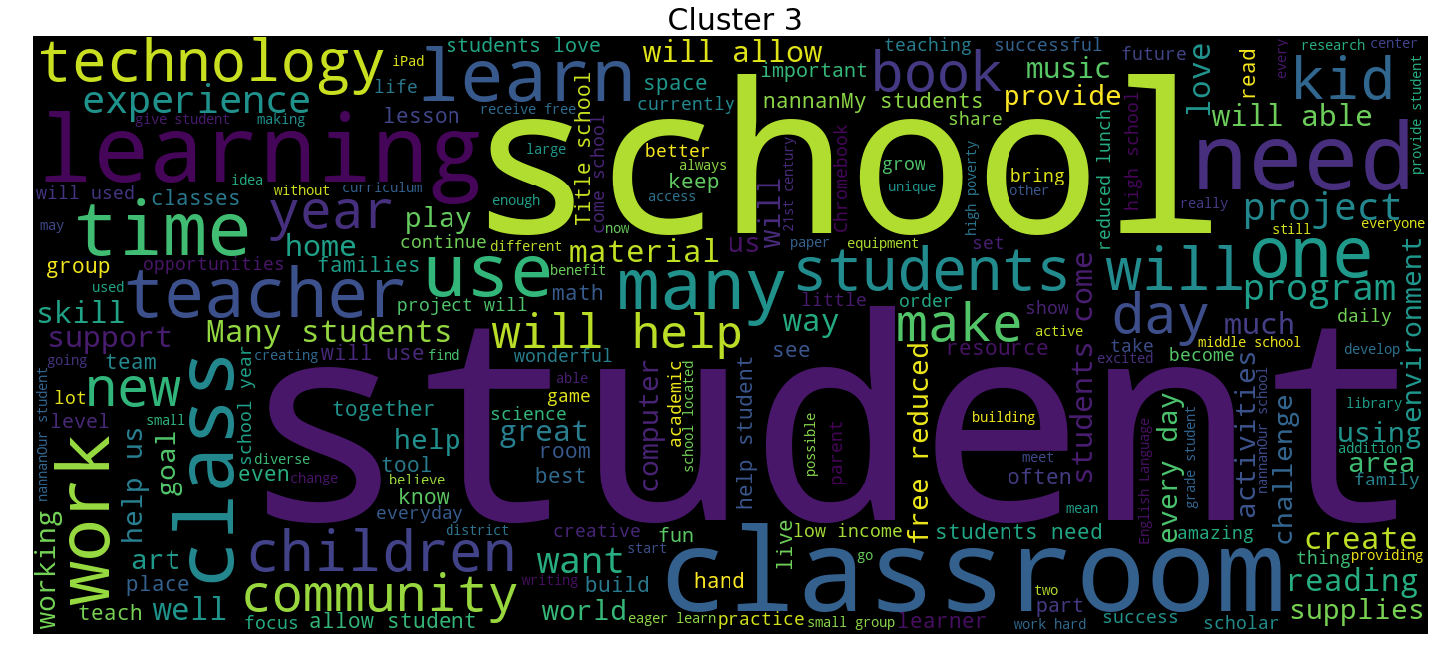

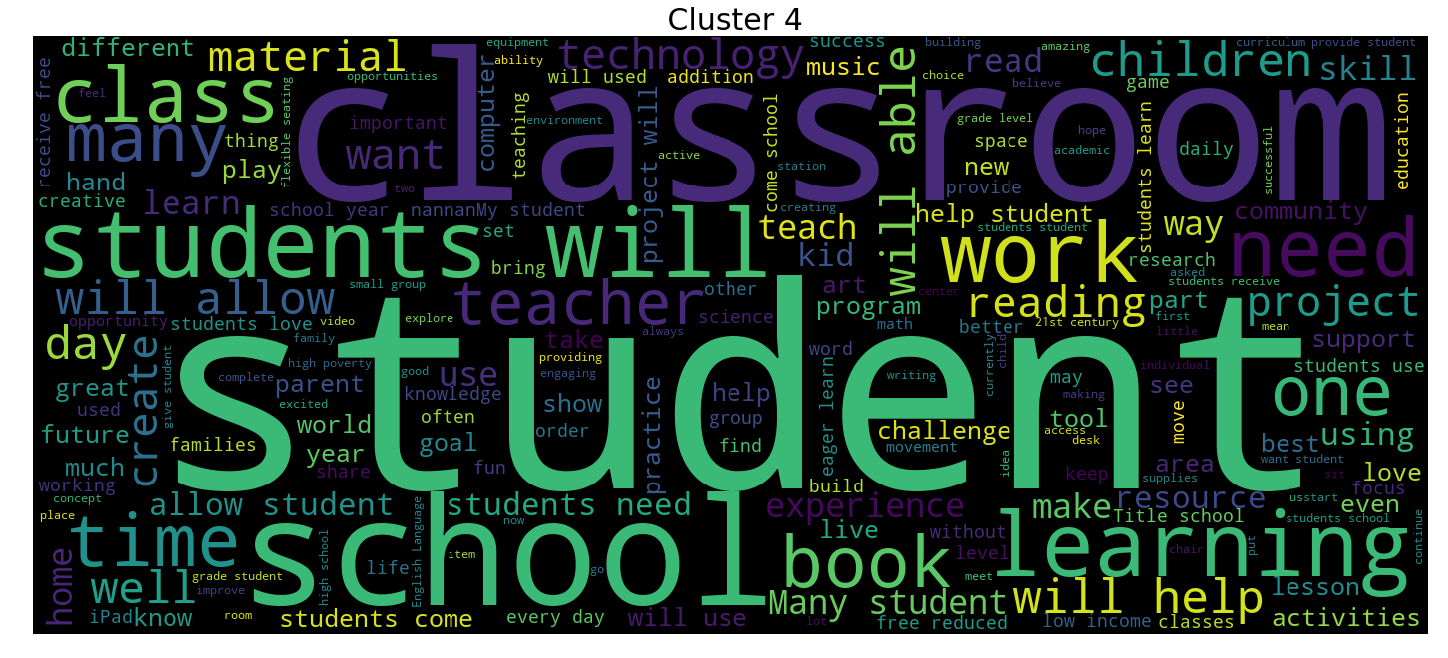

In [38]:
from wordcloud import WordCloud

for i in clusterSet:
    for j in clusterSet[i]:
        clusterText[i] = clusterText.get(i, '') + donor.iloc[j]['cleanEssay']
        
for i in range( bestN ):
   
    # Create and generate a word cloud image:
    wordcloud = WordCloud( background_color='black', width=1400, height=600 ).generate( clusterText[i] )

    # Display the generated image:
    fig = plt.figure( figsize=(25,20) )
    plt.imshow( wordcloud )
    plt.title(f' Cluster {i}', size=30)
    plt.axis('off')
    plt.show()

plt.show()

In [46]:
clusterText[0][30000:31000]

"faces if and when we receive our new equipment!With a variety of PE equipment, my students will be able to expand their knowledge of what it means to be healthy and physically fit. We will use these materials to learn new ways to work together, become stronger mentally and physically, and learn more about how our bodies work. Your generous donations will aid my kindergarten students in refining their gross and fine motor skills, and also challenge my older students to strategize and cooperate, all while learning to live a healthy lifestyle. My hope is that my students would then take what they've learned in my elementary PE class and turn it into a lifetime of healthy living.nannanI am fortunate enough to work with exceptional students every day. My students are unique learners who express themselves creatively and honestly. They see outside the box and beyond themselves. They are caring, empathetic and have strong desire to help others. Many of my students have struggled with feeling

In [47]:
clusterText[1][30000:31000]

'ated in a very small town in the foothills of Appalachia. We serve approximately six hundred students, and I will be working with one hundred fifth-graders on Language Arts this academic year.Most of my students currently do not have technology available in their homes. They are only familiar with what is available through the classrooms and labs in our school. The only computers that I have available in my room are now too outdated for the type of use we need.These computers cannot be updated. My students need to be able to use the internet for research, online testing , and online programs for various study skills. At our school we use these in our computer labs, however, my students would greatly benefit from being able to access the internet without leaving our class room. The students from our rural area need to be able to move into the modern world without ever leaving home.nannanAs a teacher in a low-income/high poverty school, my students are faced with several challenges both

## Agglomerative Clustering

In [144]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

n = [2, 5, 8, 11 ]
sscore = []

print(' '*13,'- First -', ' '*17,'- Second -', ' '*16,'- Third -', ' '*16,'- Fourth -')
print( end='        ')

for i in n:
    
    agg = AgglomerativeClustering( n_clusters = i )
    agg.fit( xtr1.toarray() )
    
    score = silhouette_score( xtr1, agg.labels_, random_state=42)
    sscore.append(score)
    
    print('#'*20, end ='        ' )
    
# silhouette_score : Compute the mean Silhouette Coefficient of all samples.
# The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the....
# ...mean nearest-cluster dist (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). 
# To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of

              - First -                   - Second -                  - Third -                  - Fourth -
        ####################        ####################        ####################        ####################        

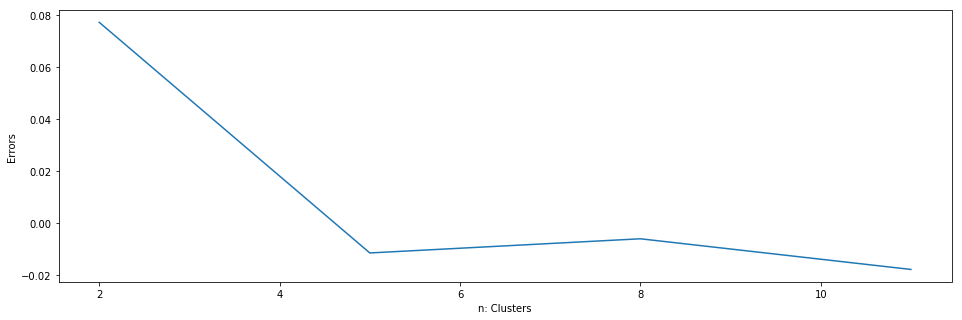

In [145]:
import matplotlib.pyplot as plt

plt.figure( figsize=(16,5) ) 
plt.plot( n, sscore )
plt.xlabel('n: Clusters')
plt.ylabel('Errors')
plt.show()

In [147]:
bestN = 5
agg = AgglomerativeClustering( n_clusters= bestN )
agg.fit( xtr1.toarray() )


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=5,
            pooling_func=<function mean at 0x0000024326BBAE18>)

In [148]:
label = set(agg.labels_)
label

{0, 1, 2, 3, 4}

In [149]:
clusterSet = { i: np.where( agg.labels_ == i )[0] for i in range(bestN)}
clusterText = dict()

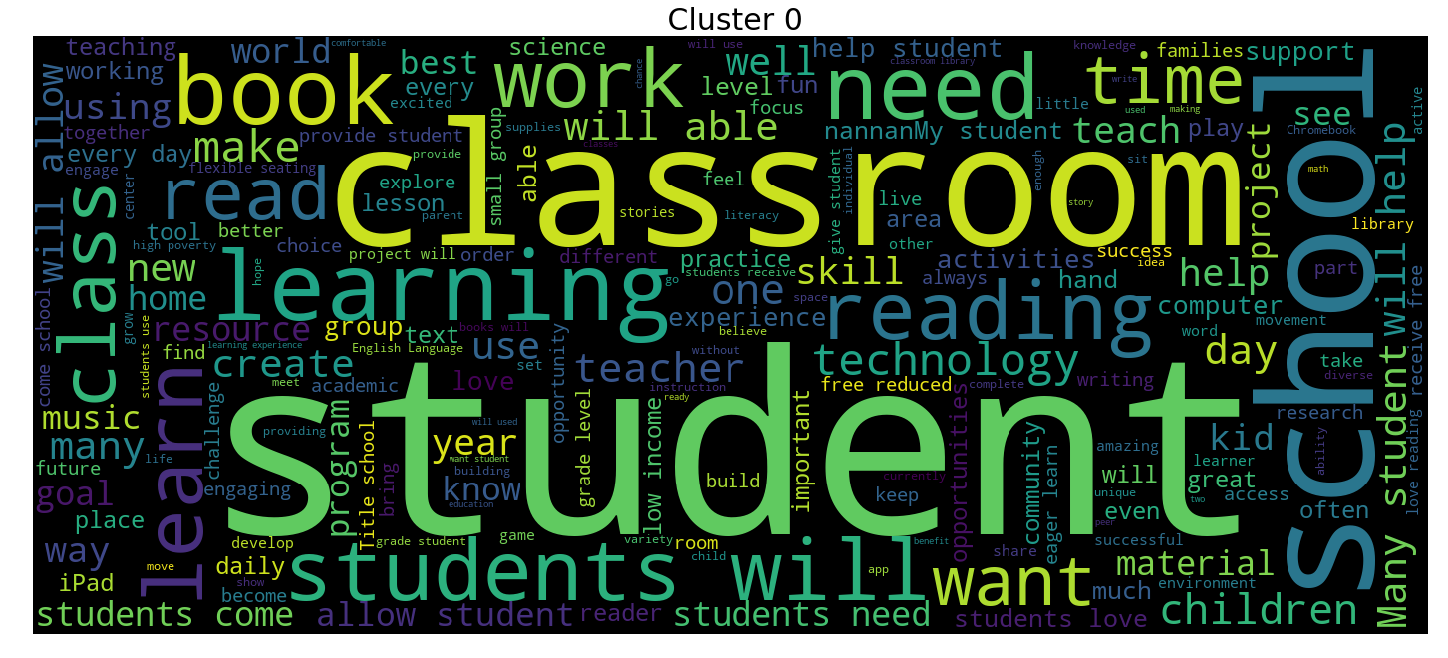

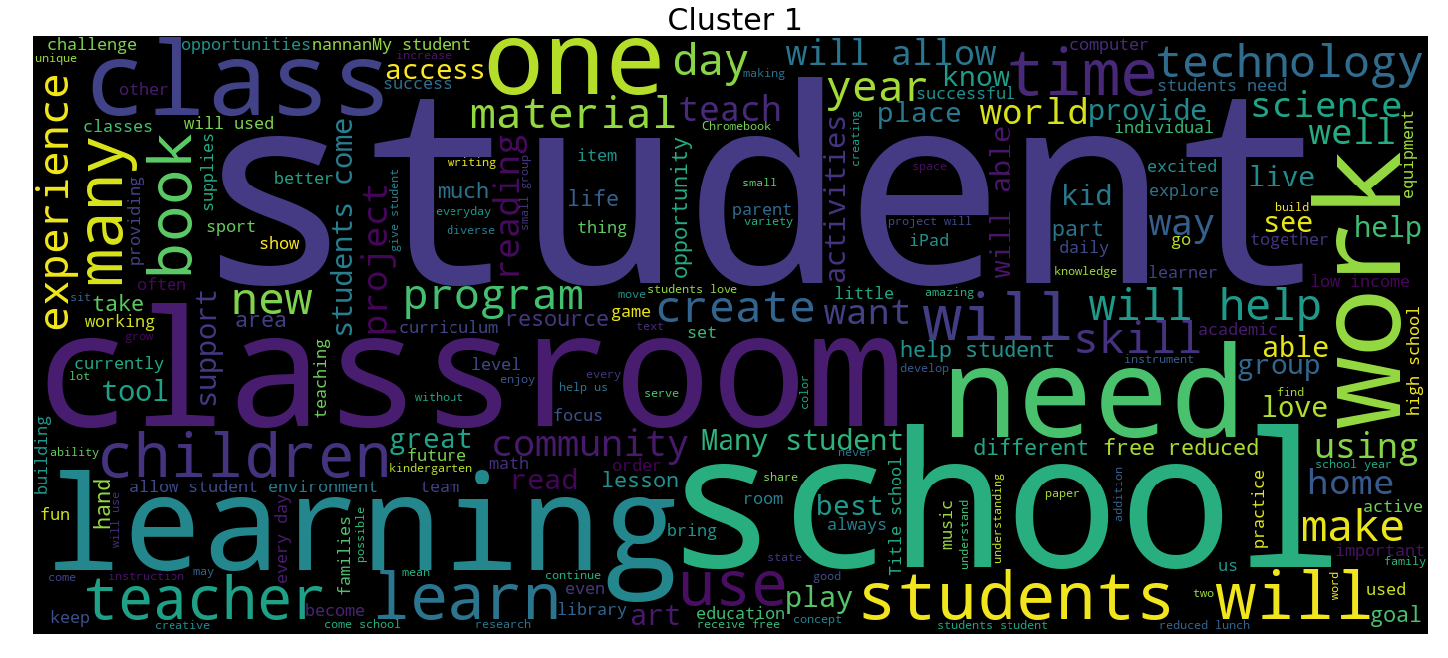

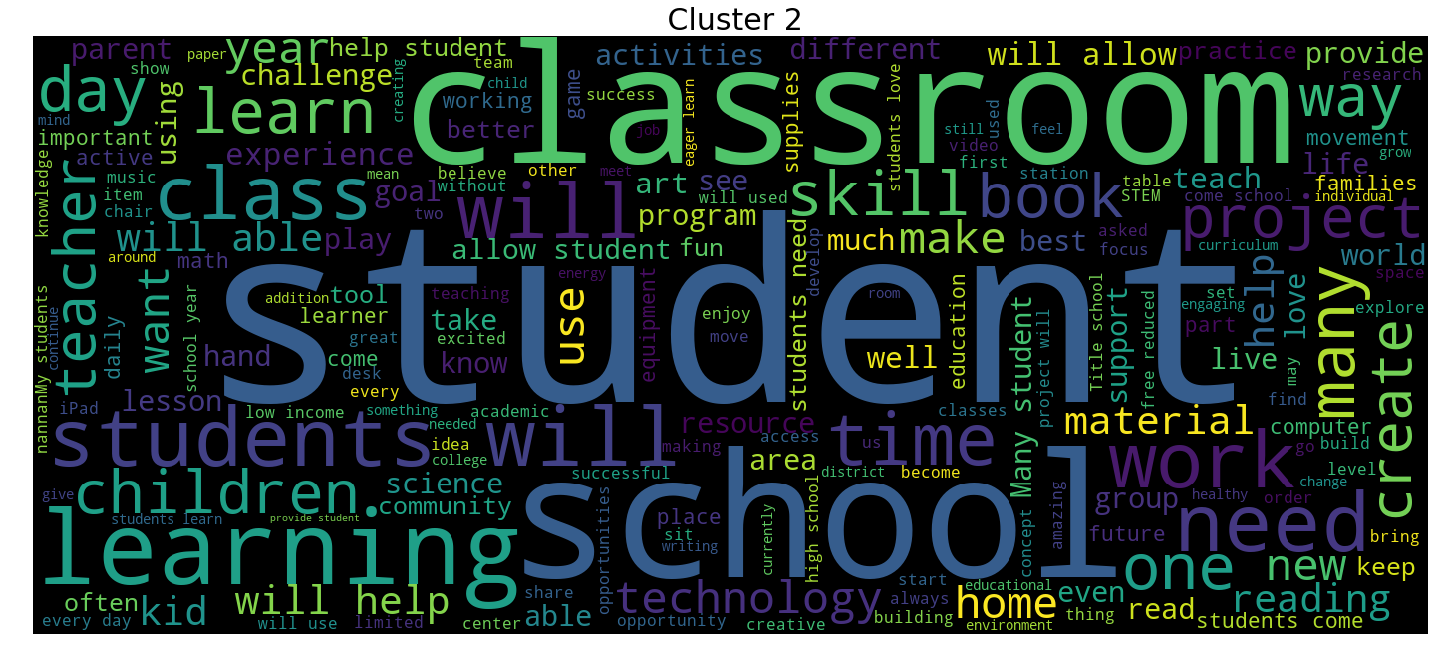

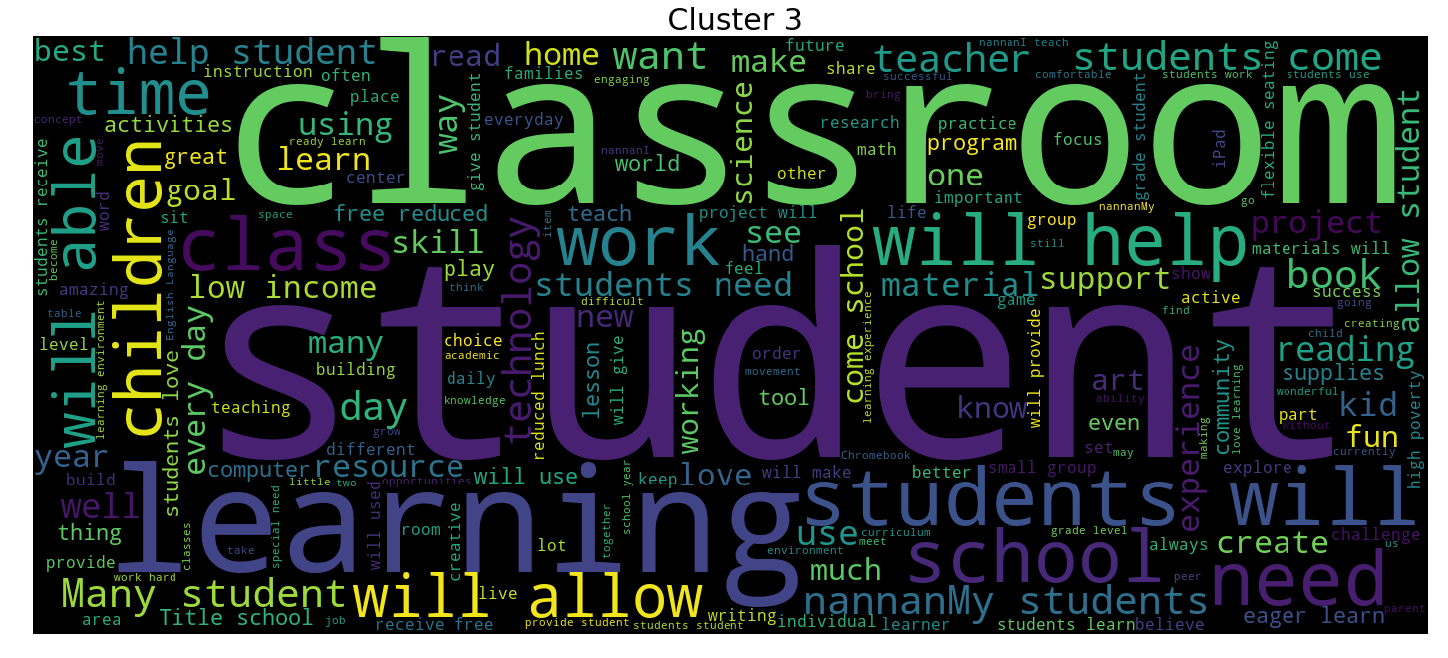

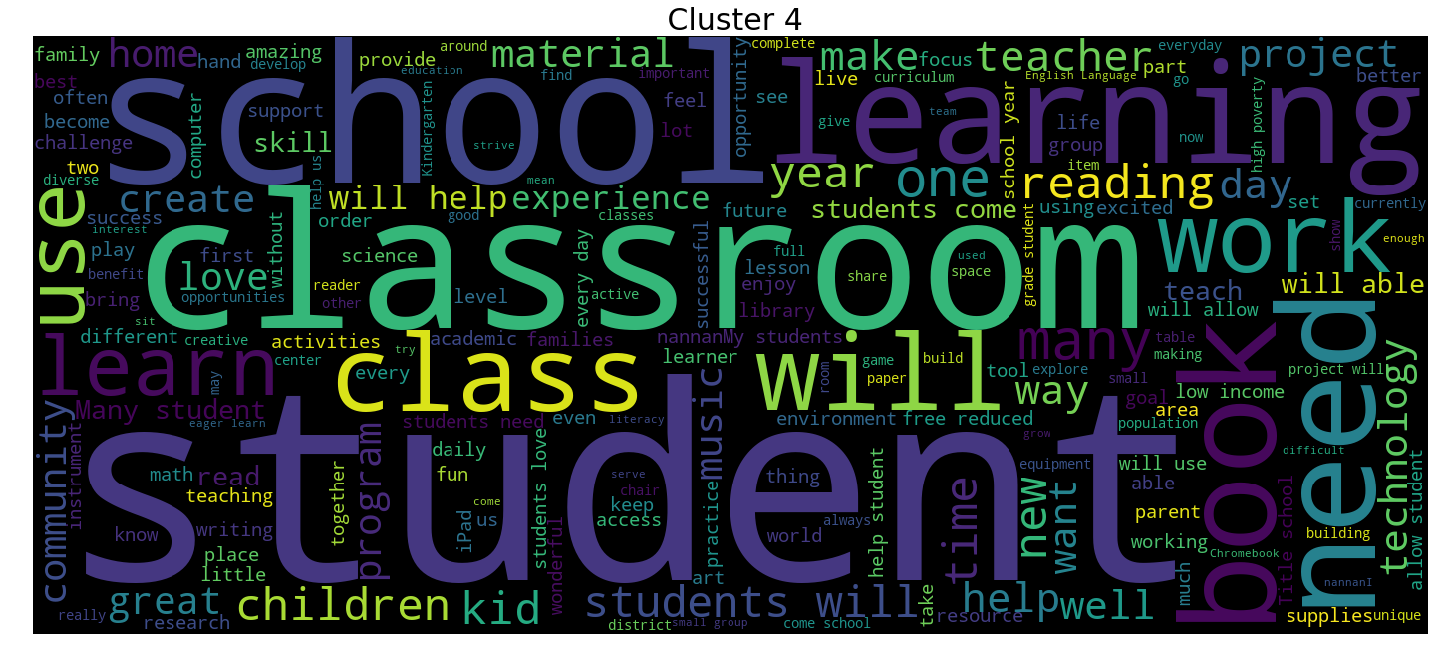

In [150]:
from wordcloud import WordCloud

for i in clusterSet:
    for j in clusterSet[i]:
        clusterText[i] = clusterText.get(i, '') + donor.iloc[j]['cleanEssay']
        
for i in range( bestN ):
   
    # Create and generate a word cloud image:
    wordcloud = WordCloud( background_color='black', width=1400, height=600 ).generate( clusterText[i] )

    # Display the generated image:
    fig = plt.figure( figsize=(25,20) )
    plt.imshow( wordcloud )
    plt.title(f' Cluster {i}', size=30)
    plt.axis('off')
    plt.show()

plt.show()

In [151]:
clusterText[0][30000:31000]

' of school and thought their lives as they continue to grow. Engagement is KEY and the possibilities are endless. Students will learn at faster rates when they are interested in what they are doing. Technology is everywhere and students are often glued into a screen. Bringing these tools into the classroom will create excitement in students as well as provide them with additional activities they can use to practice and grow. We will be able to practice research on a variety of topics, typing essays and using programs to create knowledge.nannanMy students are middle school students from a high-poverty urban area. They are individuals with exceptional learning needs, meaning that each student is very different from the others and they learn differently from their same-age peers. Their academic abilities and performances are currently at various levels, requiring that their work be very different. Providing for these differences helps my students to be successful. It also helps them to p

In [152]:
clusterText[1][30000:31000]

's being poor."The materials we\'re requesting are already all the kids can talk about and they\'re not even here yet! My students all rave about playing video games and are interested in gaming more than just about anything else! I want to capitalize on their love of gaming and get kids thinking about the element of design in technology. My kids can code and love to build already. This would give them another skill in their quest to master technology and how to be creative in the modern world. Bloxels cultivate imagination and discovery through a hands on approach to designing video games. The students use blocks and a game-board to design sets and characters and then used tablets to watch their creations come to life.nannanI teach the third grade gifted/high achieving class. This year my students were fortunate enough to have their own laptops. My students are constantly doing research projects and working cooperatively together in groups and pairs. They are often spread out all over

In [153]:
clusterText[3][30000:31000]

'e we spend outdoors! They love to be active and play with our limited outdoor equipment choices!My students enjoy their time outside each day! They have asked for specific activities that will help them be more active while letting them have fun! These cone obstacle course activities and hurdles will allow the students time to be active and more energized while moving from station to station! Each cone station will offer a different activity while allowing the students to move through rotation stations! After they have completed the full rotation, the students will have had the opportunity to move in many exciting and energizing ways thus allowing them to be active! The cone stations are easily set up by the students themselves which will give them ownership! Students are more apt to use the equipment if they feel it is their ideas to participate! The colorful designs as well as the activities involved will have them hooked from the first time they set them up and will draw more stude

## DBSCAN

In [91]:
xtr1.shape

(5000, 3860)

In [127]:
from sklearn.neighbors import NearestNeighbors

n = 20
nbrs = NearestNeighbors( n_neighbors = n )
nbrs.fit( xtr1 )

distances, indices = nbrs.kneighbors( xtr1 )

dist = sorted( distances[ :, n-1 ], reverse=True )


# kneighbors : Finds the K-neighbors of a point. Returns indices of and distances to the neighbors of each point.

In [141]:
print( distances.shape )
print( distances[0] )
print( distances[1] )
print('\n\n')
print( distances[ :2, 0] ) # first 2 Row and 0 th col 
print( distances[ :2, n-1] ) # first 2 row and n-1 th col


(5000, 20)
[ 0.         21.9089023  22.7815715  22.8035085  22.82542442 22.93468988
 23.         23.04343724 23.04343724 23.06512519 23.21637353 23.2594067
 23.3023604  23.3023604  23.34523506 23.38803113 23.40939982 23.40939982
 23.43074903 23.4520788 ]
[ 0.         20.51828453 20.83266666 20.90454496 21.         21.14237451
 21.14237451 21.23676058 21.42428529 21.47091055 21.47091055 21.47091055
 21.54065923 21.58703314 21.61018278 21.63330765 21.65640783 21.67948339
 21.67948339 21.70253441]



[21.9089023  20.51828453]
[23.4520788  21.70253441]


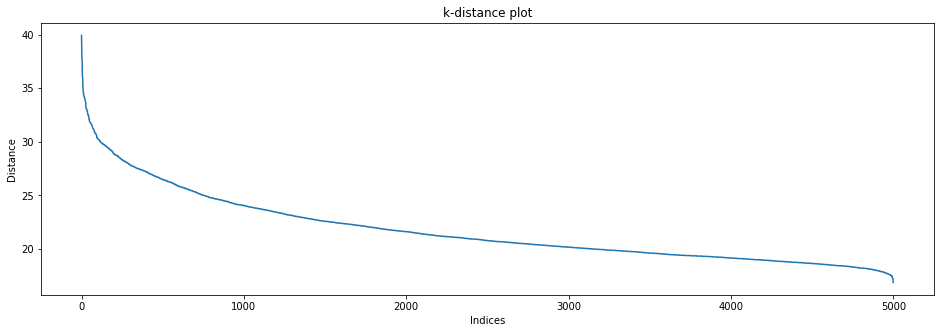

In [126]:
plt.figure( figsize=(16,5))
plt.plot( indices[:,0], dist )
plt.ylabel('Distance')
plt.xlabel('Indices')
plt.title('k-distance plot')
plt.show()

In [95]:
from sklearn.cluster import DBSCAN

db = DBSCAN( eps=30 )
db.fit( xtr1 )

# eps (float) : The max dist bw two samples for one to be considered as in the neighborhood of the other. 
# This is not a maximum bound on the distances of points within a cluster. 
# This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

DBSCAN(algorithm='auto', eps=30, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [98]:
db.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [107]:
label = set(db.labels_)
label

{-1, 0}

In [105]:
clusterSet = { i: np.where( db.labels_ == i )[0] for i in range(-1,1)}
clusterText = dict()

In [108]:
clusterSet

{-1: array([ 134,  150,  210,  477,  498,  519,  621,  748,  934, 1038, 1046,
        1080, 1123, 1474, 1645, 1954, 2030, 2128, 2250, 2251, 2265, 2383,
        2481, 2493, 2505, 2514, 2644, 2806, 2829, 2965, 3114, 3407, 3441,
        3481, 3736, 3759, 3810, 4195, 4214, 4508, 4591, 4812, 4839, 4921,
        4925], dtype=int64),
 0: array([   0,    1,    2, ..., 4997, 4998, 4999], dtype=int64)}

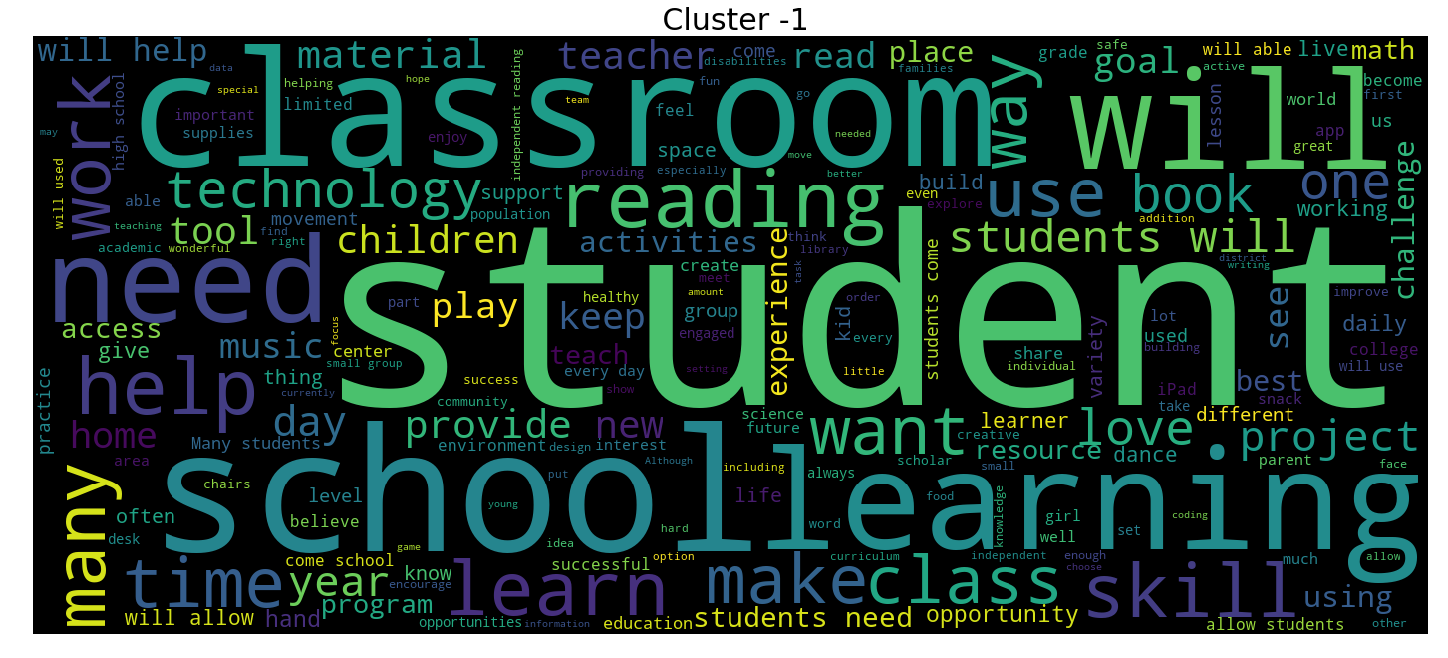

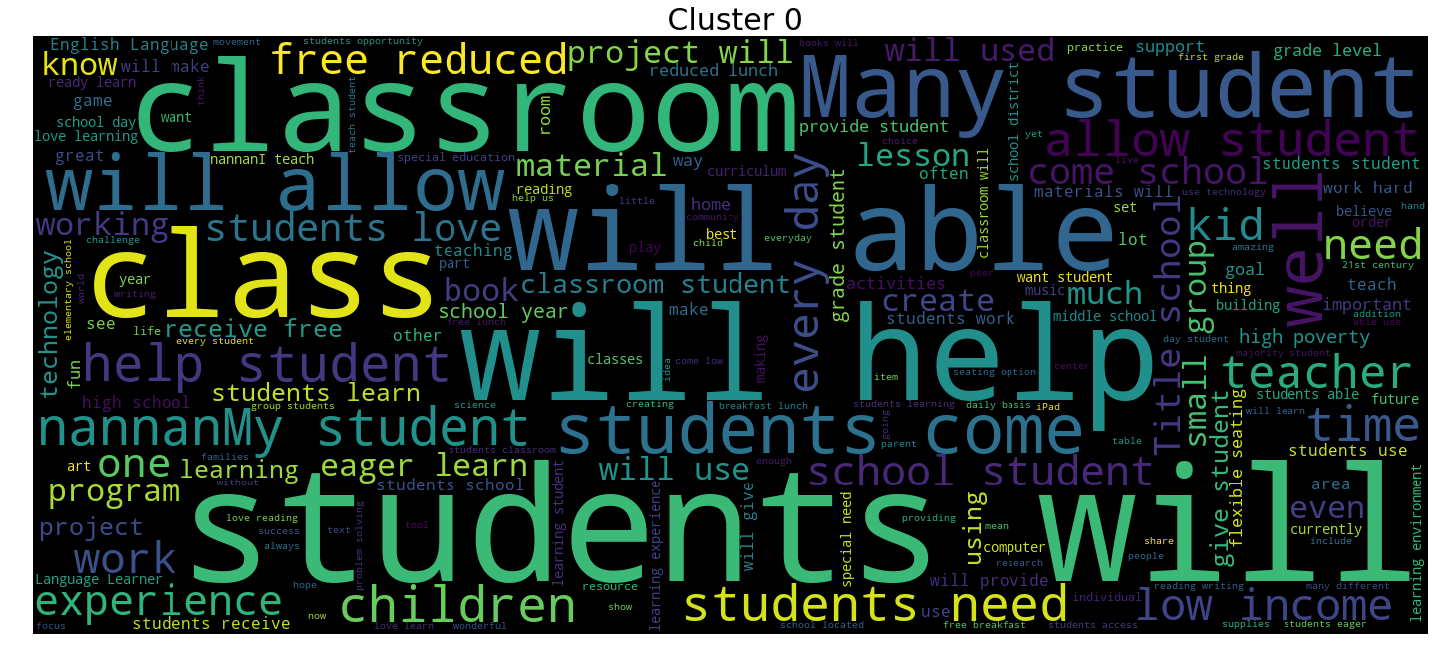

In [110]:
from wordcloud import WordCloud

for i in clusterSet:
    for j in clusterSet[i]:
        clusterText[i] = clusterText.get(i, '') + donor.iloc[j]['cleanEssay']
        
for i in range( -1,1 ):
   
    # Create and generate a word cloud image:
    wordcloud = WordCloud( background_color='black', width=1400, height=600 ).generate( clusterText[i] )

    # Display the generated image:
    fig = plt.figure( figsize=(25,20) )
    plt.imshow( wordcloud )
    plt.title(f' Cluster {i}', size=30)
    plt.axis('off')
    plt.show()

plt.show()

In [113]:
clusterText[-1][:1000]

'My students are as unique and wonderful as they come. They belong to our vibrant and diverse urban community whose population is close to 300,000. Most of my students; ages 5-12, are members of a self-contained special education class at their perspective schools. All of my students have been identified as having one of the 14 disabilities named under the Individuals With Disabilities Education Act (IDEA). The majority have autism, intellectual disabilities or multiple disabilities. They are an integral part of a school district that is more than 76% Black and Hispanic and where 65% of the students qualify for the free and reduced lunch program. Although, my students come from a vast variety of home situations, they all come to school each day hoping to be loved and understood. Most of my students learn best through movement and play and learn they do! Not all enjoy being physically active but through our time together in Adapted Physical Education class, all are learning to be profic

In [114]:
clusterText[-1][30000:31000]

'ny students at our school but they are lacking access. Our school has one laptop cart with 20 laptops for each building. At one time each building has about 300 students in it. Teachers are constantly grappling to book the cart weeks in advance. We often have to postpone lessons involving technology or teach them without it because of the carts not being available at the right time. Daily access to technology is a fundamental necessity prepare our students for 21st century careers.nannanWe have 700 fifth and sixth graders in our school with various learning styles, cultural backgrounds, ideas, and socioeconomic status. Our students are learning how to be more than just consumers of information and technology. They are being empowered and encouraged to take risks and to learn from their mistakes They are creators, makers, and inventors. We believe in student leadership and an inquiry based approach to learning, so we are constantly looking for ways to inspire them, to challenge them, a

In [115]:
clusterText[0][30000:31000]

' to grow and learn. My students are kind, caring, creative, and hardworking! In my classroom they learn to always try their best. I work hard to teach my students that perfection is not a requirement , but they are expected to do their personal best each and every day. I love watching my students grow throughout the school year. Together we overcome challenges and rejoice in successes. I love my job and my students are the best!My 2nd grade students will benefit from having privacy shields to use while testing or while completing independent work and projects. In a large group, it is easy for students to become distracted by the noises and things going on around them. These privacy shields allow students to have their own private space that is quiet, free from distractions, and helps support critical thinking. Please help my students gain a quiet space of their own where they can show off their awesome abilities! Every student capable of producing great work. These privacy shields wil

In [154]:
from prettytable import PrettyTable
    
x = PrettyTable()


x.field_names = [" Vectorizer ", " Clustering ", " Hyperparameter "]

x.add_row( [  " B.O.W ", " K Means Clustering ", " n_clusters : 5 " ] ) 
x.add_row( [  " B.O.W ", " Aglomerative  ", " n_clusters : 5 "] )
x.add_row( [  " B.O.W ", " DBSCAN ", " eps = 30 "] )

print( x )

# Ref : http://zetcode.com/python/prettytable/

+--------------+----------------------+------------------+
|  Vectorizer  |      Clustering      |  Hyperparameter  |
+--------------+----------------------+------------------+
|    B.O.W     |  K Means Clustering  |  n_clusters : 5  |
|    B.O.W     |    Aglomerative      |  n_clusters : 5  |
|    B.O.W     |        DBSCAN        |     eps = 30     |
+--------------+----------------------+------------------+
